In [1]:
import pandas as pd
import numpy as np
import snoop
from pprint import pprint as print
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
pd.set_option("display.width", 5000)
pd.set_option("display.max_columns", 60)
plt.rcParams["figure.figsize"] = (15, 10)

%load_ext snoop
%config InlineBackend.figure_format = 'retina'

# show all output not only the last result
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel("/Users/glebsokolov/HeadRepo/DataSets/test case data analyst.xlsx")

df_trial, df_notrial = (
    df[df["is_trial_period"] == True],
    df[df["is_trial_period"] == False],
)
clients = set(df.user_id)
# df_notrial, df_trial;


In [4]:
df_payed = df_notrial.groupby("user_id").count()["quantity"]

df_left = df_trial.set_index("user_id").drop(df_payed.index, axis=0)

ltv = pd.DataFrame(df_payed)
ltv = ltv.rename({"quantity": "nweeks"}, axis=1)
ltv["ltv"] = ltv["nweeks"] * 4.99
ltv


In [74]:

jul01 = pd.to_datetime('2020-07-01')

In [72]:
jan = df[(df['purchase_date']<='jan31')]
income = sum(4.99*jan[jan['is_trial_period']==False].groupby('user_id').count()['quantity']) # доход 
expenses = 6*len(jan.groupby('user_id').count()['quantity'])
ROMI = 100*(income - expenses)/expenses
ROMI # За 4 месяца

-54.3356755680199

In [75]:
period = df[(df['purchase_date']<=jul01) & df['is_trial_period']==False]

In [96]:
def calculate_romi(start):
    period = df[(df["purchase_date"] <= start) & df["is_trial_period"] == False]
    earnings = 4.99 * period.groupby("user_id").count()["quantity"]
    return (sum(earnings) - 6 * len(period.groupby("user_id").count()["quantity"])) / (
        6 * len(period.groupby("user_id").count()["quantity"])
    )


In [97]:
calculate_romi(jul01)

1.1781786554792575

<AxesSubplot:xlabel='purchase_date'>

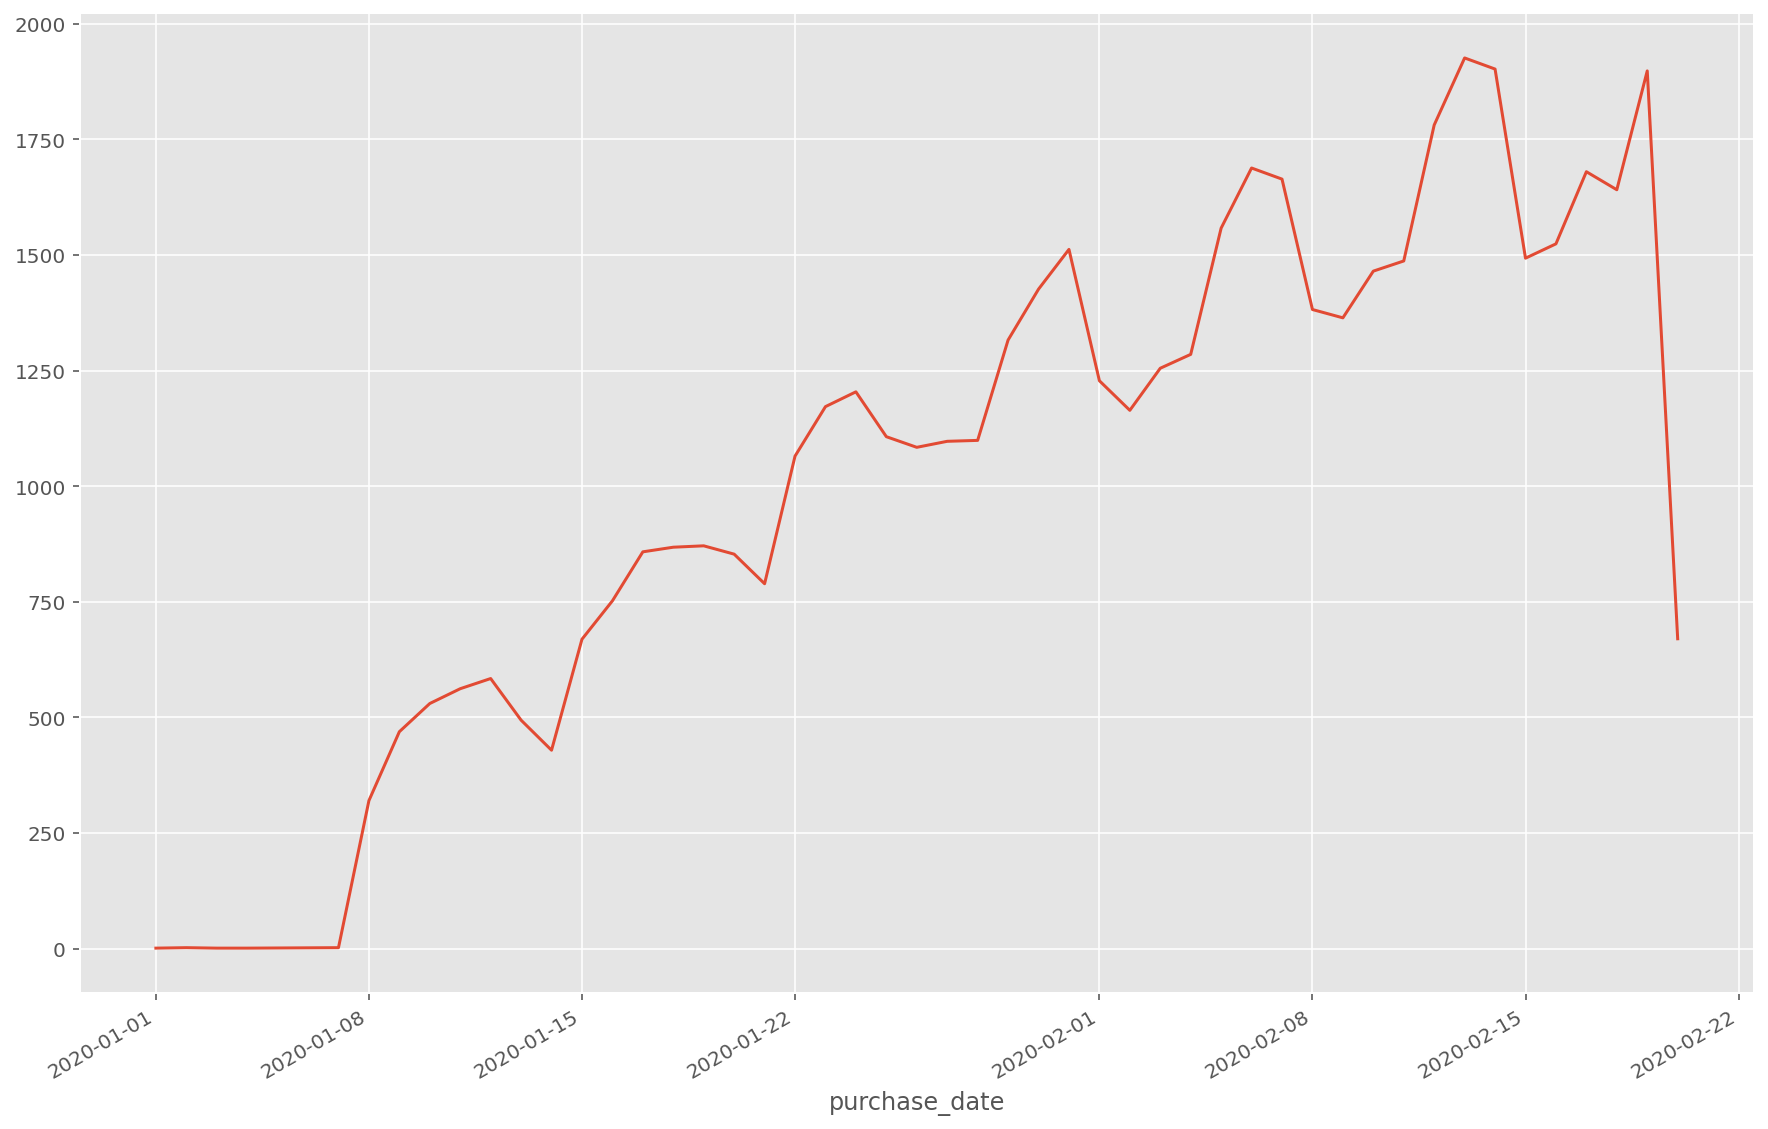

In [7]:
df_notrial.groupby("purchase_date").count()["user_id"].sort_index().plot()


In [12]:
df.groupby("user_id").sum()["quantity"];
y = df_notrial.groupby("purchase_date").count()["user_id"].sort_index().values
x = [
    df_notrial.groupby("purchase_date")
    .count()["user_id"]
    .sort_index()
    .index[i]
    .timestamp()
    for i in range(len(y))
]
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)


user_id
404        2
5337       1
9010       4
19880      1
23403      4
          ..
9694642    1
9694662    1
9694699    1
9694734    1
9694775    1
Name: quantity, Length: 62909, dtype: int64

LinearRegression()

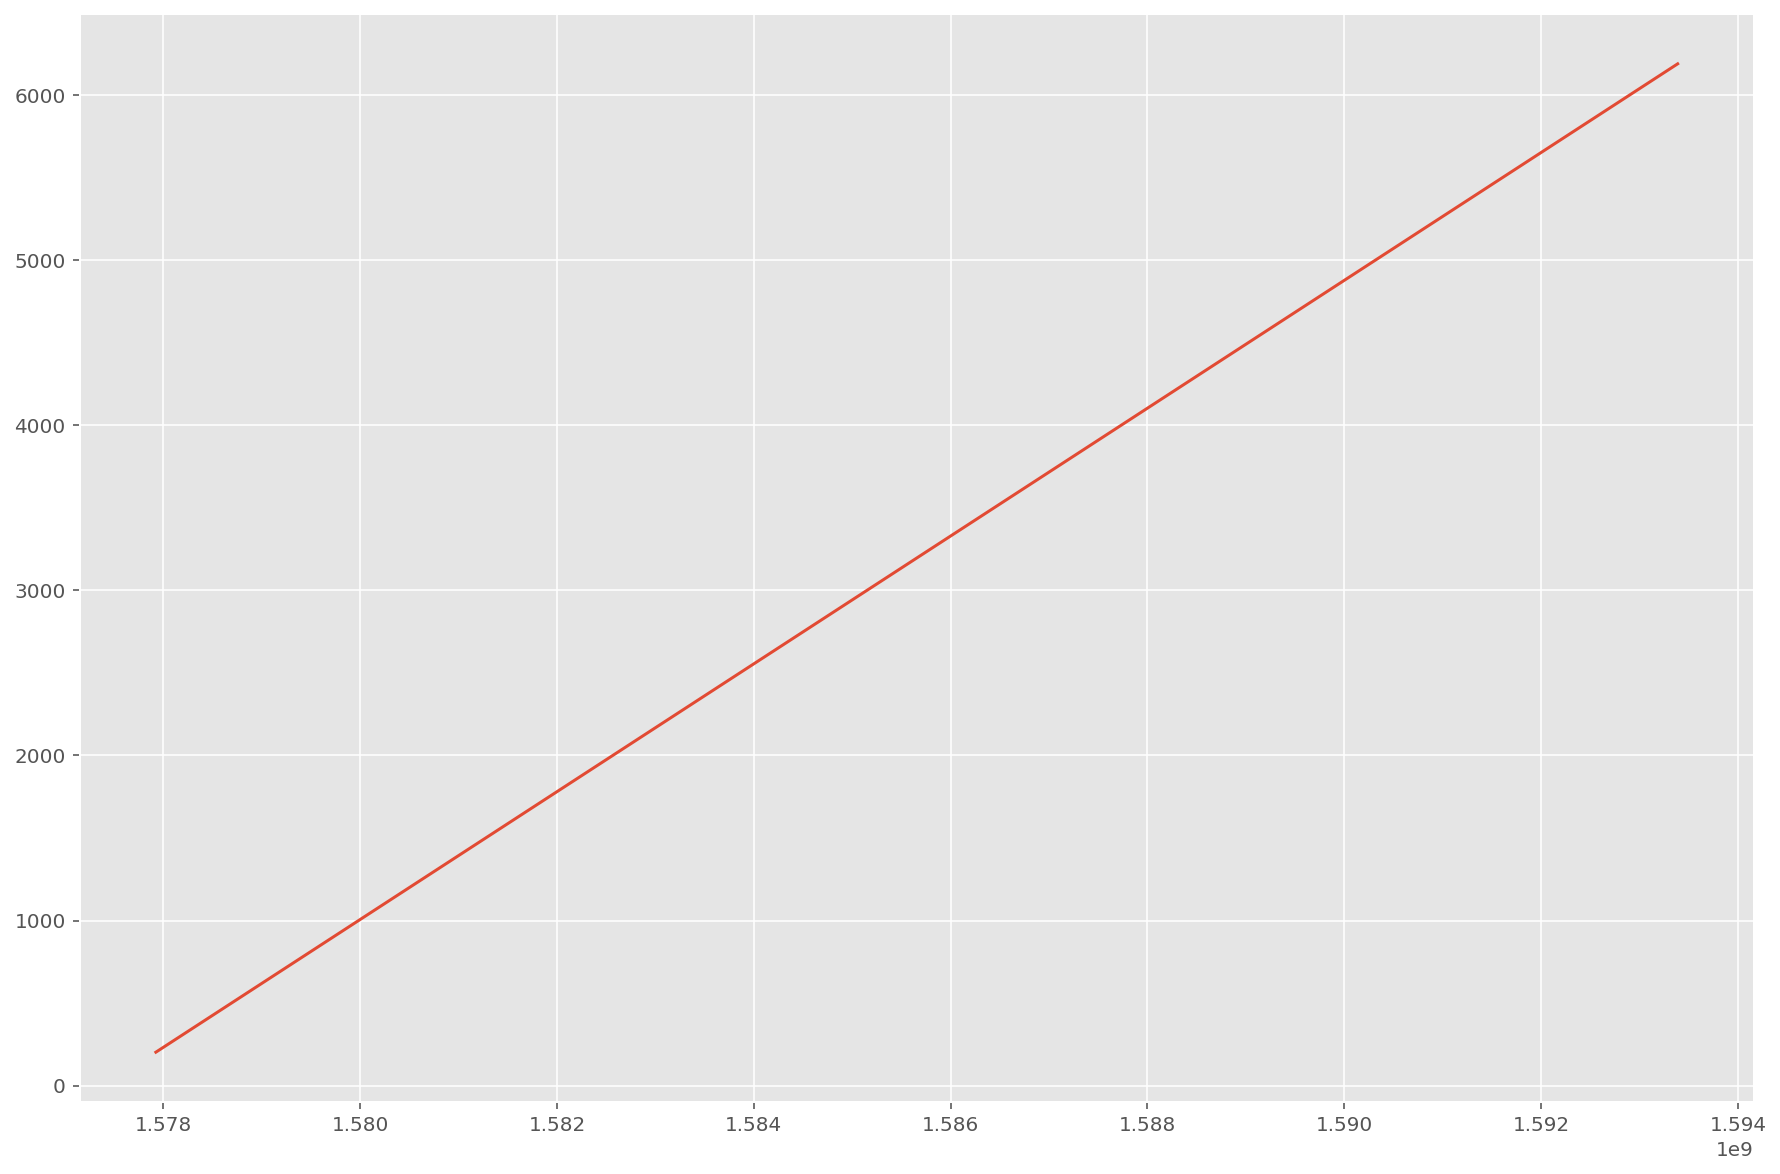

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

DAY = 86400

days = [[x[0][0] + (i + 1) * DAY] for i in range(180)]
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(days)
plt.plot(days, preds)
